In [1]:
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
from scipy.fftpack import fft, fftfreq, fftshift
import datetime
from datetime import datetime

In [2]:
datos= pd.read_csv("szl_data.csv", names = ("Anio", "Mes", "dia", "Hora", "Altura" ), header = 0)
#altura está en mm

In [3]:
df = datos.dropna()

In [4]:
df['date']= df.apply(lambda x:datetime.strptime("{0} {1} {2} {3}".format(x[u'Anio'],x[u'Mes'], x[u'dia'], x[u'Hora']), "%Y %m %d %H"),axis=1)

In [5]:
df['Altura'] =pd.to_numeric(df['Altura'], errors = 'coerse')

In [6]:
df.head()

,Anio,Mes,dia,Hora,Altura,date
0,2016,1,1,0,670.0,2016-01-01 00:00:00
1,2016,1,1,1,506.0,2016-01-01 01:00:00
2,2016,1,1,2,384.0,2016-01-01 02:00:00
3,2016,1,1,3,330.0,2016-01-01 03:00:00
4,2016,1,1,4,356.0,2016-01-01 04:00:00


In [7]:
df = df.dropna()

In [8]:
df_ft = df[(df['date'] >= '2016-01-01 00:00:00') & (df['date'] <= '2016-03-31 23:00:00')]

In [9]:
df_ft.head()

,Anio,Mes,dia,Hora,Altura,date
0,2016,1,1,0,670.0,2016-01-01 00:00:00
1,2016,1,1,1,506.0,2016-01-01 01:00:00
2,2016,1,1,2,384.0,2016-01-01 02:00:00
3,2016,1,1,3,330.0,2016-01-01 03:00:00
4,2016,1,1,4,356.0,2016-01-01 04:00:00


In [10]:
df_ft.ftypes

Anio               int64:dense
Mes                int64:dense
dia                int64:dense
Hora               int64:dense
Altura           float64:dense
date      datetime64[ns]:dense
dtype: object

In [11]:
df_ft.tail()

,Anio,Mes,dia,Hora,Altura,date
2179,2016,3,31,19,266.0,2016-03-31 19:00:00
2180,2016,3,31,20,366.0,2016-03-31 20:00:00
2181,2016,3,31,21,503.0,2016-03-31 21:00:00
2182,2016,3,31,22,645.0,2016-03-31 22:00:00
2183,2016,3,31,23,763.0,2016-03-31 23:00:00


In [12]:
df_ft.describe()

,Anio,Mes,dia,Hora,Altura
count,2184.0,2184.000000,2184.000000,2184.000000,2184.000000
mean,2016.0,2.000000,15.681319,11.500000,787.375000
std,0.0,0.825609,8.778701,6.923772,452.832935
min,2016.0,1.000000,1.000000,0.000000,-297.000000
25%,2016.0,1.000000,8.000000,5.750000,476.000000
50%,2016.0,2.000000,16.000000,11.500000,775.000000
75%,2016.0,3.000000,23.000000,17.250000,1124.500000
max,2016.0,3.000000,31.000000,23.000000,1886.000000


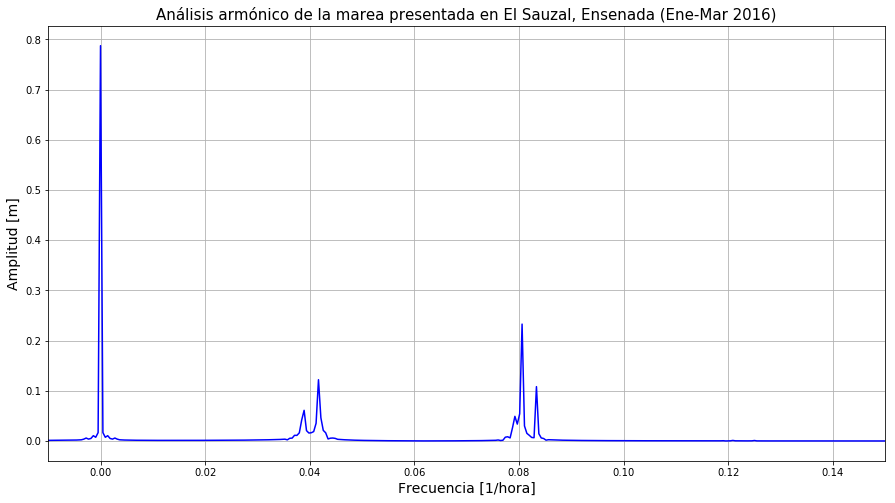

In [20]:
from scipy.fftpack import fft, fftfreq, fftshift
import numpy as np
# number of points
N = 2184
# sample spacing
T = 1.0
y = df_ft["Altura"]/1000
yf = fft(y)
xf = fftfreq(N, T)
xf = fftshift(xf)
yplot = fftshift(yf)
import matplotlib.pyplot as plt
plt.plot(xf, 1.0/N *np.abs(yplot), 'b-')
plt.xlim(-0.01, 0.15) 
plt.grid(True)
plt.xlabel('Frecuencia [1/hora]', fontsize=14)
plt.ylabel('Amplitud [m]', fontsize=14)
plt.title('Análisis armónico de la marea presentada en El Sauzal, Ensenada (Ene-Mar 2016)', fontsize=15)
fig = plt.gcf()
fig.set_size_inches(15, 8)
plt.show()

In [14]:
a = np.absolute(yf)/N #N es el numero de datos especificado en donde se trabajó con la transformada rapida de fourier
a

array([ 0.787375  ,  0.01676625,  0.00750436, ...,  0.01065301,
        0.00750436,  0.01676625])

In [15]:
N/2

1092.0

In [16]:

print(np.where(a[:,]>0.045))
b= a[a[:,]>0.045]
b

(array([   0,   85,   91,   92,  173,  175,  176,  182, 2002, 2008, 2009,
       2011, 2092, 2093, 2099], dtype=int64),)


array([ 0.787375  ,  0.06116306,  0.12211821,  0.04636385,  0.04916663,
        0.05419251,  0.23289058,  0.10834019,  0.10834019,  0.23289058,
        0.05419251,  0.04916663,  0.04636385,  0.12211821,  0.06116306])

In [17]:
1/xf[int(1092 +173),]

12.6242774566474

In [18]:
#La 0 es la que se encuentra en el origen, pues es la altura media que se presenta para las mareas en Monterey
print( 'Primer Armónico notorio')
print('Amplitud=',np.absolute(yf[85,]/N))
print('frecuencia=', xf[int(1092 +85),])
print('periodo', 1/xf[int(1092 +85),])
print()
print('Segundo Armónico notorio')
print('Amplitud=',np.absolute(yf[91,]/N))
print('frecuencia=', xf[int(1092 +91),])
print('periodo', 1/xf[int(1092 +91),])

print()
print('Tercer Armónico notorio')
print('Amplitud=',np.absolute(yf[173,]/N))
print('frecuencia=', xf[int(1092 +173),])
print('periodo', 1/xf[int(1092 +173),])

print()
print('Cuarto armónico notorio')
print('Amplitud=',np.absolute(yf[176,]/N))
print('frecuencia=', xf[int(1092 +176),])
print('periodo', 1/xf[int(1092 +176),])

print()
print('Quinto armónico notorio')
print('Amplitud=',np.absolute(yf[182,]/N))
print('frecuencia=', xf[int(1092 +182),])
print('periodo', 1/xf[int(1092 +182),])


Primer Armónico notorio
Amplitud= 0.0611630636175
frecuencia= 0.0389194139194
periodo 25.6941176471

Segundo Armónico notorio
Amplitud= 0.122118205378
frecuencia= 0.0416666666667
periodo 24.0

Tercer Armónico notorio
Amplitud= 0.0491666306361
frecuencia= 0.0792124542125
periodo 12.6242774566

Cuarto armónico notorio
Amplitud= 0.232890581289
frecuencia= 0.0805860805861
periodo 12.4090909091

Quinto armónico notorio
Amplitud= 0.108340186303
frecuencia= 0.0833333333333
periodo 12.0


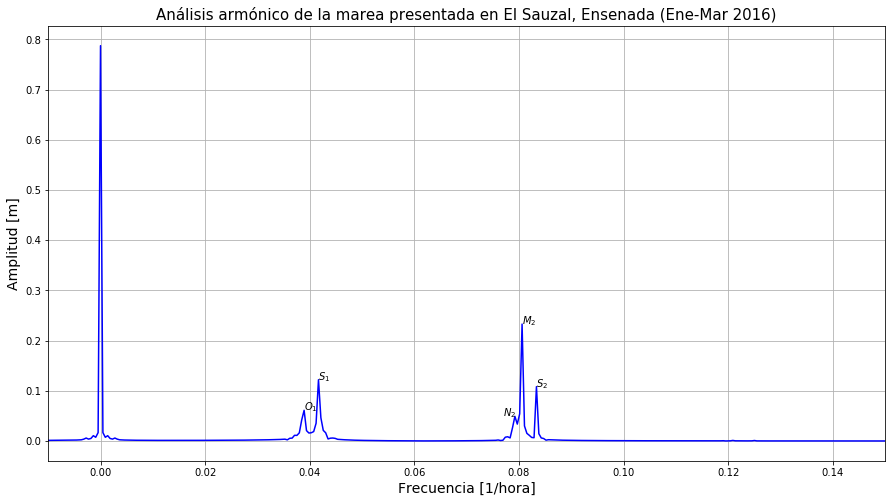

In [21]:
fig = plt.gcf()
fig.set_size_inches(15, 8)

plt.plot(xf, 1.0/N *np.abs(yplot), 'b-')
plt.xlim(-0.01, 0.15) 
plt.grid(True)
plt.xlabel('Frecuencia [1/hora]', fontsize=14)
plt.ylabel('Amplitud [m]', fontsize=14)
plt.title('Análisis armónico de la marea presentada en El Sauzal, Ensenada (Ene-Mar 2016)', fontsize=15)

plt.text(0.0389194139194, 0.0611630636175, '$O_1$')
plt.text(0.0416666666667, 0.122118205378, '$S_1$')
plt.text(0.077, 0.0491666306361, '$N_2$')
plt.text(0.0805860805861, 0.232890581289, '$M_2$')
plt.text(0.0833333333333, 0.108340186303, '$S_2$')


plt.show()
